## Session 2 - Defining functions

In [6]:
def hello():
    print("Hello world!")

In [8]:
hello()

Hello world!


In [11]:
def hello(name):
    print("Hello " + name + "!")

In [14]:
hello("Sofie")

Hello Sofie!


In [19]:
def hello(name = "World"): # if one does not define the name, the default will just be the string "World"
    """
    This function takes a name and prints message on the screen
    """
    print("Hello " + name + "!")

In [18]:
hello()

Hello World!


### Excercises

In [37]:
#Conting vowels:
#Write a loop that counts the number of vowels in a character string.

vowels = 'aeiouAEIOU'
chatacter_string = "aaaabbbbbcccc"
count = 0

for chr in chatacter_string:
    if chr in vowels:
        count += 1
    
print(f'The number of vowels in this string is {count}')


The number of vowels in this string is 4


### Working with image data

In [145]:
import os
import sys
sys.path.append("..")

# opencv
import cv2

# loading some utility functions
from utils.imutils import jimshow as show
from utils.imutils import jimshow_channel as show_channel

In [97]:
filepath = os.path.join("..",
                        "..",
                        "..",
                        "cds-vis-data",
                        "data", 
                        "img",
                        "trex.png")

In [98]:
# load using cv2

image = cv2.imread(filepath)

In [99]:
type(image)

numpy.ndarray

In [100]:
image.shape # (228, 350, 3)

(228, 350, 3)

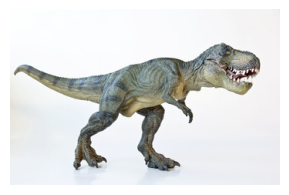

In [101]:
show(image)

In [102]:
# save output

outpath = os.path.join("output", "new_trex.png")

cv2.imwrite(outpath, image)

True

### Inspecting images

In [103]:
height = image.shape[0]
width = image.shape[1]
depth = image.shape[2]


In [69]:
height

228

In [72]:
height * width # 79,800 = number of pixels in total

79800

In [104]:
image[0, 0] 
# pixel intensity in the defined area is [254, 254, 254], which equals white (as seen in the image above)
# BGR (normally its RGB (Red, green, and blue), but in cv2 its flipped to be blue, green, red)

array([254, 254, 254], dtype=uint8)

In [105]:
# get pixel values
## BGR
blue, green, red = image[0, 0]

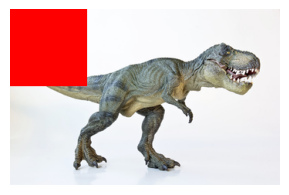

In [111]:
image[0:100, 0:100] = (0, 0, 255) # now we have changed the given pixel to red
show(image)

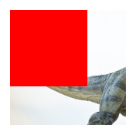

In [114]:
show(image[0:150, 0:150])

In [143]:
fun_image2 = image
fun_image2[100:150, 100:150] = (0, 200, 0) 
fun_image2[150:200, 150:200] = (98, 0, 0)
fun_image2[13:24, 13:24] = (0, 0, 134)



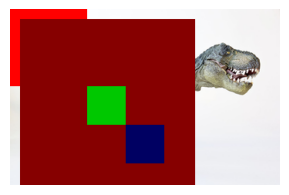

In [144]:
show(fun_image2)

### Extracting histograms

In [152]:
filepath_2 = os.path.join("..",
                        "..",
                        "..",
                        "cds-vis-data",
                        "data", 
                        "img",
                        "terasse.jpeg")

image2 = cv2.imread(filepath_2)

In [153]:
type(image2)

numpy.ndarray

In [154]:
image2.shape # (1576, 1200, 3)

(1576, 1200, 3)

In [174]:
# split into seperate channels

blue, green, red = cv2.split(image2) # splits image into color channels

In [175]:
blue # all values on the blue color channel

array([[239, 238, 224, ...,  99,  95, 100],
       [244, 240, 149, ..., 110,  96,  80],
       [228, 237, 152, ..., 106,  98,  83],
       ...,
       [206, 168, 173, ..., 142, 137, 147],
       [214, 182, 178, ..., 103, 123, 144],
       [205, 147, 168, ..., 186, 194, 186]], dtype=uint8)

In [ ]:
#show_channel(blue)
#show_channel(green)
show_channel(red)

In [181]:
# grayscale

greyed_image = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY) 

#show_channel(greyed_image)

In [190]:
image2.flatten().shape # (5673600,)

(5673600,)

In [191]:
import matplotlib.pyplot as plt

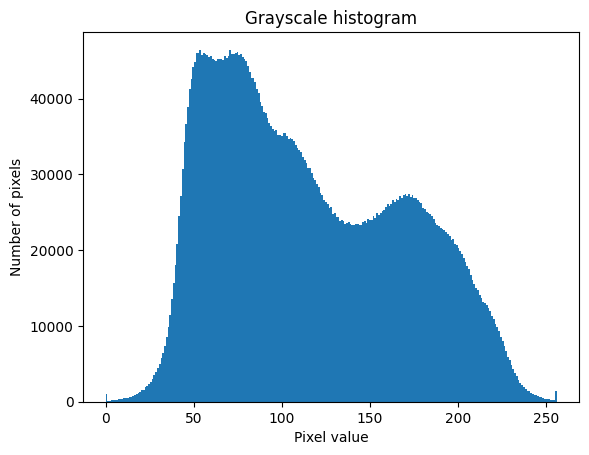

In [198]:
# create my canvas
plt.figure()

# add my histogram
plt.hist(image2.flatten(), 255, [0,256])

# 255 = highest pixel value = max size of histogram
# [0,256]= range that my histogram can maximum take

# add title
plt.title("Grayscale histogram")

# add labels on axis
plt.xlabel("Pixel value")
plt.ylabel("Number of pixels")

# show plot
plt.show()